# Segmentation

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import PIL
from os.path import join
import json
from pprint import pprint

import sys
sys.path.append('../DataLoader')

from Dataset import Dataset
from helpers import imshow

## Creation of a Dataset container

In [2]:
DATASET_PATH= '../Data'
dp = Dataset(path=DATASET_PATH)[0]

## Segmentation visualization

Set a random color map for segmentation visualization and apply it to segmentation map

Text(0.5, 1.0, 'Segmentation map')

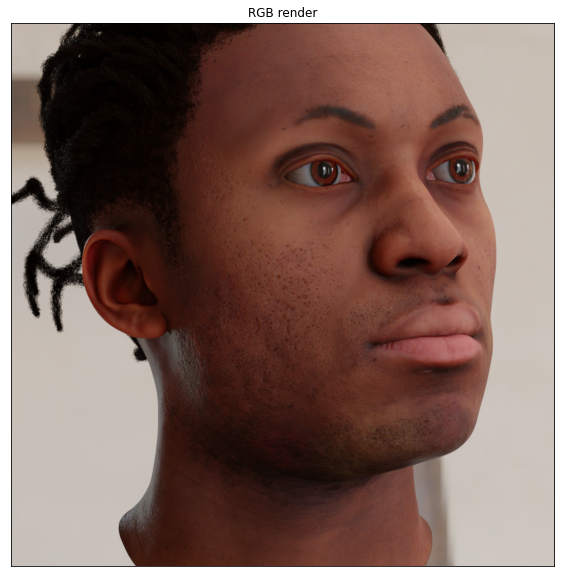

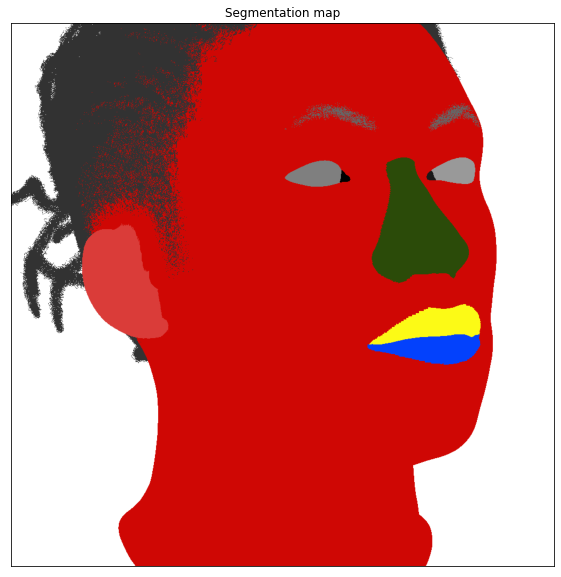

In [3]:
imshow(dp.rgb_img)
plt.title('RGB render')

imshow(dp.semantic_seg_map)
plt.title('Segmentation map')

## Background replacement
We'll remove the original background from the image using the segmentation map and replace it with a new random background

Let's load the new background and crop it to the render size

In [4]:
random_background = plt.imread('../Images/random_background.jpg')
random_background = PIL.Image.fromarray(random_background).crop(box=(0, 0, dp.rgb_img.shape[0], dp.rgb_img.shape[1]))
random_background = np.asarray(random_background)

Create a background mask (all the segmentation map pixels with values = 1)

Text(0.5, 1.0, 'Background mask')

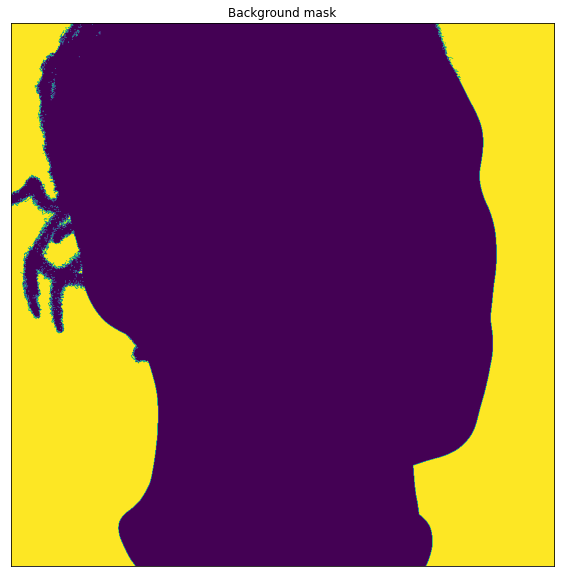

In [5]:
background_mask = np.logical_and.reduce(dp.semantic_seg_map == 1., axis=2)
imshow(background_mask.astype('float'))
plt.title('Background mask')

Now replace the background pixels from the render with the new background's pixels

Text(0.5, 1.0, 'Rgb render with the new background')

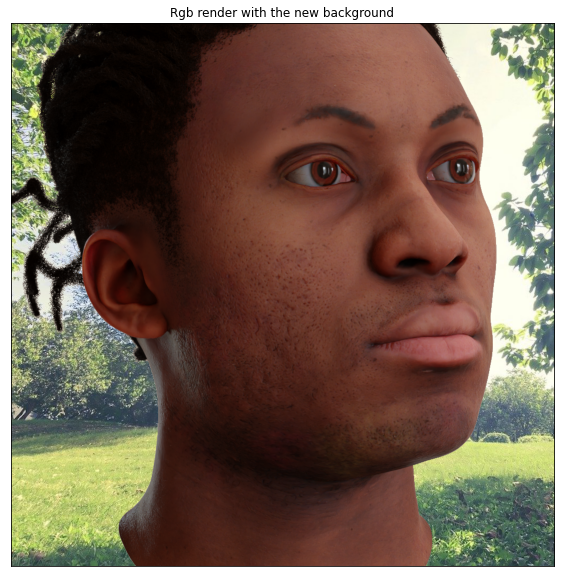

In [6]:
rgb_new_background = dp.rgb_img.copy()
rgb_new_background[background_mask] = np.asarray(random_background)[background_mask]

imshow(rgb_new_background)
plt.title('Rgb render with the new background')

## Segment extraction

This function comes to fix the numerical differences between the loaded EXR segmentation map and the JSON dictionary<br>
We apply the function to both the JSON and the EXR to get matchable values

In [ ]:
def standardize_seg_color(color):
    return np.round(np.asarray(color).astype(np.float16), 2)

We load the JSON file and apply the standardization function to each of its values<br>
<b>NOTE</b>: The segmentation map will soon be part of the DataLoader, so that there won't be a need to manually load the JSON file

In [ ]:
segmentation_json_path = join(DATASET_PATH, 'environment_00001', 'semantic_segmentation_metadata.json')
with open(segmentation_json_path) as f:
    d = json.load(f)
    seg_dict = {k: standardize_seg_color(d[k]) for k in d.keys()}
print('Standardized dictionary:\n')
pprint(seg_dict)

Standardized dictionary:

{'Mouth_geo': array([0.99, 0.03, 0.95], dtype=float16),
 'Teeth_low_geo': array([0.8, 0.8, 0.8], dtype=float16),
 'Teeth_up_geo': array([0.7, 0.7, 0.7], dtype=float16),
 'eye_left': array([0.6, 0.6, 0.6], dtype=float16),
 'eye_right': array([0.5, 0.5, 0.5], dtype=float16),
 'eyebrows': array([0.4, 0.4, 0.4], dtype=float16),
 'head': array([0.82, 0.03, 0.02], dtype=float16),
 'left_ear': array([0.18, 0.96, 0.45], dtype=float16),
 'lower_lip': array([0.02, 0.26, 0.99], dtype=float16),
 'nose': array([0.17, 0.3 , 0.04], dtype=float16),
 'right_ear': array([0.86, 0.24, 0.23], dtype=float16),
 'scalp': array([0.2, 0.2, 0.2], dtype=float16),
 'tearduct_left': array([0.1, 0.1, 0.1], dtype=float16),
 'tearduct_right': array([0., 0., 0.], dtype=float16),
 'upper_lip': array([0.99, 0.98, 0.09], dtype=float16)}


We apply the standardization function to the segmentation map as well and show all the different segments separately

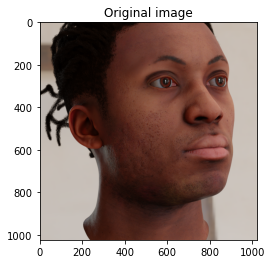

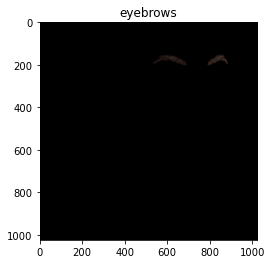

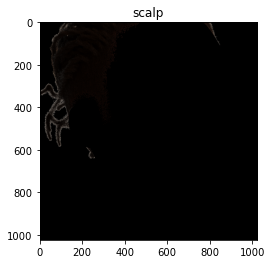

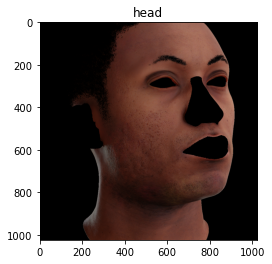

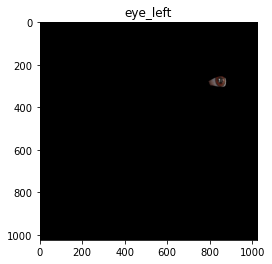

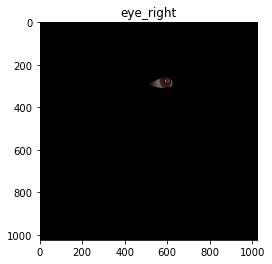

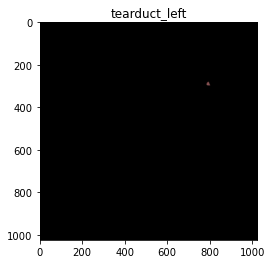

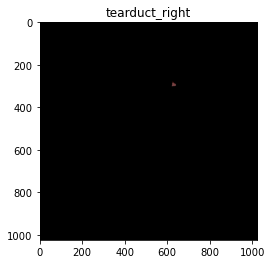

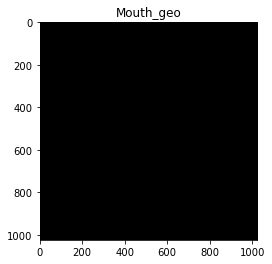

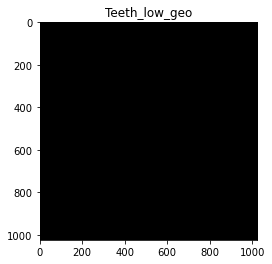

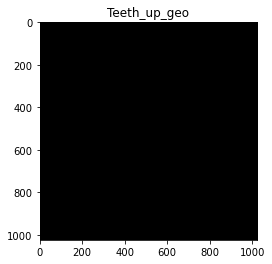

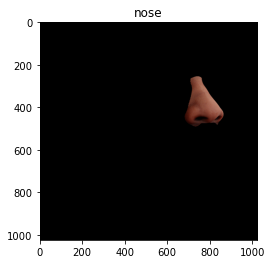

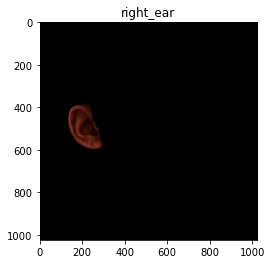

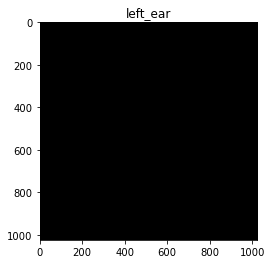

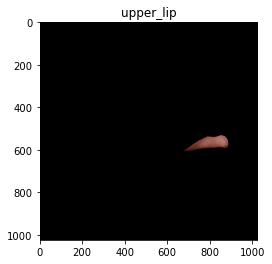

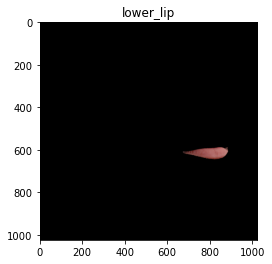

In [ ]:
seg_img = standardize_seg_color(dp.semantic_seg_map)
plt.imshow(dp.rgb_img)
plt.title('Original image')

for seg_name in seg_dict:
    seg_color = seg_dict[seg_name]
    seg_mask = (seg_img == seg_color).all(axis=-1)

    plt.figure()
    segment_img = dp.rgb_img.copy()
    segment_img[~np.stack([seg_mask, seg_mask, seg_mask], axis=2)] = 0
    plt.imshow(segment_img)
    plt.title(seg_name)